<a href="https://colab.research.google.com/github/kapil0808/Kaggle-first-problem/blob/main/Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
products =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/olist_products_dataset.csv', usecols=['product_id','product_category_name'])

orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/olist_orders_dataset.csv',usecols = ['order_id','customer_id'])

prod = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/olist_order_items_dataset.csv',usecols = ['product_id','order_id'])

customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/olist_customers_dataset.csv',usecols = ['customer_id','customer_zip_code_prefix','customer_city'])

#location = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/olist_geolocation_dataset.csv', usecols = ['customer_zip_code_prefix'])

reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/olist_order_reviews_dataset.csv',usecols = ['order_id','review_score','review_comment_message'])
def describe_data(df):
    print("Data Types:")
    print(df.dtypes)
    print("Rows and Columns:")
    print(df.shape)
    print("Column Names:")
    print(df.columns)
    print("Null values")
    print(df.isnull().sum())
describe_data(products)

Data Types:
product_id               object
product_category_name    object
dtype: object
Rows and Columns:
(32951, 2)
Column Names:
Index(['product_id', 'product_category_name'], dtype='object')
Null values
product_id                 0
product_category_name    610
dtype: int64


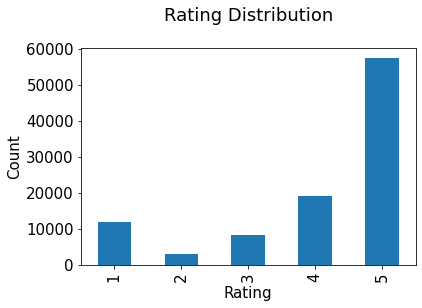

In [3]:
plt.rc("font", size=15)
reviews.review_score.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

Method — 1 : Recommendation system on Popularity Based

In [4]:
comb_product = pd.merge(products, prod, on ='product_id')
comb_product.head(5)

,product_id,product_category_name,order_id
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb


In [5]:
comb_product_review = pd.merge(comb_product,reviews, on = 'order_id')
comb_product_review = pd.merge(comb_product_review,orders, on = 'order_id')
comb_product_review.head(5)

,product_id,product_category_name,order_id,review_score,review_comment_message,customer_id
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,5,Super adooorei o delineador ele é bem preto e ...,f8a3e963a310aa58b60a5b1fed5bceb5
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,5,Excelente apontador! Em 3 segundos uma ponta p...,03fc97548af8f58fefc768d12b546c9c
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,5,NaN,e41819d1c95c12c9ce495b630eab8aee
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,1,modelo comprado: travesseiro memoria carinho B...,322162b5ca010c2b059cb5224dd818b1
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,5,NaN,c11c31965ff02cc1d7132df8edfcbc22


In [6]:
comb_product_review=comb_product_review.dropna(subset = ['product_category_name', 'review_score'])
comb_product_review.head(5)

,product_id,product_category_name,order_id,review_score,review_comment_message,customer_id
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,5,Super adooorei o delineador ele é bem preto e ...,f8a3e963a310aa58b60a5b1fed5bceb5
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,5,Excelente apontador! Em 3 segundos uma ponta p...,03fc97548af8f58fefc768d12b546c9c
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,5,NaN,e41819d1c95c12c9ce495b630eab8aee
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,1,modelo comprado: travesseiro memoria carinho B...,322162b5ca010c2b059cb5224dd818b1
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,5,NaN,c11c31965ff02cc1d7132df8edfcbc22


In [7]:
review_count = pd.DataFrame(comb_product_review.groupby('product_category_name')['review_score'].count())
review_count.sort_values('review_score', ascending=False).head()

,review_score
product_category_name,
cama_mesa_banho,11272
beleza_saude,9728
esporte_lazer,8701
moveis_decoracao,8416
informatica_acessorios,7895


Method 2 : Recommendation based on Content Filtering

In [8]:
high_review_score = comb_product_review.product_category_name[comb_product_review.review_score == 5]
high_review_score

0                     perfumaria
1                          artes
2                  esporte_lazer
4          utilidades_domesticas
5          instrumentos_musicais
                   ...          
113315    informatica_acessorios
113318    informatica_acessorios
113319    informatica_acessorios
113320    informatica_acessorios
113321           cama_mesa_banho
Name: product_category_name, Length: 62782, dtype: object

In [9]:
print(len(high_review_score.unique()))

72


In [10]:
print((high_review_score.unique()))

['perfumaria' 'artes' 'esporte_lazer' 'utilidades_domesticas'
 'instrumentos_musicais' 'cool_stuff' 'cama_mesa_banho' 'bebes'
 'informatica_acessorios' 'moveis_decoracao' 'eletronicos' 'brinquedos'
 'beleza_saude' 'automotivo' 'fashion_calcados' 'papelaria'
 'ferramentas_jardim' 'pcs' 'casa_construcao' 'relogios_presentes'
 'eletroportateis' 'agro_industria_e_comercio' 'telefonia' 'moveis_sala'
 'pet_shop' 'climatizacao' 'fashion_bolsas_e_acessorios' 'consoles_games'
 'malas_acessorios' 'eletrodomesticos' 'moveis_escritorio'
 'construcao_ferramentas_ferramentas' 'fashion_underwear_e_moda_praia'
 'construcao_ferramentas_construcao'
 'moveis_cozinha_area_de_servico_jantar_e_jardim'
 'industria_comercio_e_negocios' 'construcao_ferramentas_iluminacao'
 'construcao_ferramentas_seguranca' 'fashion_roupa_masculina'
 'livros_tecnicos' 'eletrodomesticos_2' 'livros_interesse_geral' 'bebidas'
 'market_place' 'la_cuisine' 'construcao_ferramentas_jardim'
 'casa_conforto' 'audio' 'alimentos_bebidas'

## Product Recommendation based on Popularity for New Customers

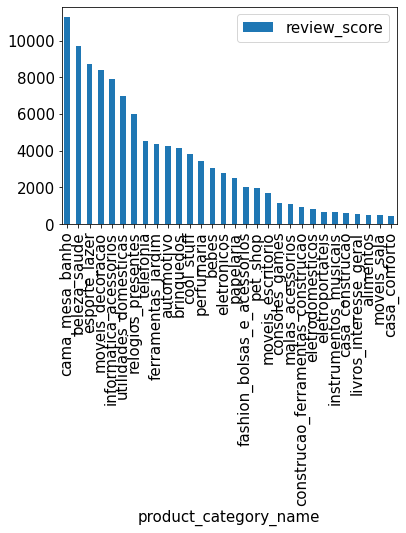

In [11]:
popular_products = pd.DataFrame(comb_product_review.groupby('product_category_name')['review_score'].count())
most_sold = popular_products.sort_values('review_score', ascending=False)
most_sold.head(30).plot(kind = "bar")

In [12]:
highestRated = pd.DataFrame(comb_product_review.groupby('product_id').agg(
    review_score_Avg = ('review_score', 'mean'),
    review_score_Count = ('review_score', 'count')
    ))

highestRated.sort_values(['review_score_Avg','review_score_Count'],ascending=False,inplace=True)           
highestRated.head(30)

,review_score_Avg,review_score_Count
product_id,,
37eb69aca8718e843d897aa7b82f462d,5.0,15
03e1c946c0ddfc58724ff262aef08dff,5.0,14
8173ca41cdb176462f9ae79821a48404,5.0,14
870bcc6c58e03ca658cfdd13db4bbe28,5.0,14
8b6ed41158b194711f83b8da92757544,5.0,14
2722b7e5f68e776d18fe901638034e54,5.0,13
143c616ec3fe0cb065c3805cf9bd812e,5.0,12
16ce899c7af0c99f46948734a0d00f0f,5.0,12
2ced45a3059cbb128a8b8b6508809746,5.0,11


In [13]:

product_ratingCount = (comb_product_review.
     groupby(by = ['product_category_name'])['review_score'].
     count().
     reset_index().
     rename(columns = {'review_score': 'total_review_score_Count'})
     [['product_category_name', 'total_review_score_Count']]
    )
product_ratingCount.head()

,product_category_name,total_review_score_Count
0,agro_industria_e_comercio,212
1,alimentos,510
2,alimentos_bebidas,280
3,artes,209
4,artes_e_artesanato,24


In [14]:
df = comb_product_review.merge(product_ratingCount, left_on = 'product_category_name', right_on = 'product_category_name', how = 'left')
df.head()

,product_id,product_category_name,order_id,review_score,review_comment_message,customer_id,total_review_score_Count
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,5,Super adooorei o delineador ele é bem preto e ...,f8a3e963a310aa58b60a5b1fed5bceb5,3435
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,5,Excelente apontador! Em 3 segundos uma ponta p...,03fc97548af8f58fefc768d12b546c9c,209
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,5,NaN,e41819d1c95c12c9ce495b630eab8aee,8701
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,1,modelo comprado: travesseiro memoria carinho B...,322162b5ca010c2b059cb5224dd818b1,3073
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,5,NaN,c11c31965ff02cc1d7132df8edfcbc22,6989


In [15]:
print(df['total_review_score_Count'].describe())

count    111710.000000
mean       5896.476090
std        3393.580684
min           2.000000
25%        3073.000000
50%        6001.000000
75%        8701.000000
max       11272.000000
Name: total_review_score_Count, dtype: float64


In [16]:
popularity_threshold = 500
popular_product= df.query('total_review_score_Count >= @popularity_threshold')
popular_product.head()

,product_id,product_category_name,order_id,review_score,review_comment_message,customer_id,total_review_score_Count
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,5,Super adooorei o delineador ele é bem preto e ...,f8a3e963a310aa58b60a5b1fed5bceb5,3435
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,5,NaN,e41819d1c95c12c9ce495b630eab8aee,8701
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,1,modelo comprado: travesseiro memoria carinho B...,322162b5ca010c2b059cb5224dd818b1,3073
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,5,NaN,c11c31965ff02cc1d7132df8edfcbc22,6989
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,c214058828b43a44f352b56ff2d5c0a5,5,NaN,3f3a10ec410c8efb0ca799fa7705d07e,681


In [17]:
popular_product.shape

(105111, 7)

In [18]:
product_features_df=popular_product.pivot_table(index='product_category_name',columns='customer_id',values='review_score').fillna(0)
product_features_df.head()

customer_id,00012a2ce6f8dcda20d059ce98491703,000161a058600d5901f007fab4c27140,0001fd6190edaaf884bcaf3d49edf079,0002414f95344307404f0ace7a26f1d5,000379cdec625522490c315e70c7a9fb,0004164d20a9e969af783496f3408652,000419c5494106c306a97b5635748086,00046a560d407e99b969756e0b10f282,00050bf6e01e69d5c0fd612f1bcfb69c,000598caf2ef4117407665ac33275130,0005aefbb696d34b3424dccd0a0e9fd0,00062b33cb9f6fe976afdcff967ea74d,00066ccbe787a588c52bd5ff404590e3,00072d033fe2e59061ae5c3aff1a2be5,0009a69b72033b2d0ec8c69fc70ef768,000bf8121c3412d3057d32371c5d3395,000e943451fc2788ca6ac98a682f2f49,000f17e290c26b28549908a04cfe36c1,000fd45d6fedae68fc6676036610f879,0010068a73b7c56da5758c3f9e5c7375,001028b78fd413e19704b3867c369d3a,00104a47c29da701ce41ee52077587d9,001051abfcfdbed9f87b4266213a5df1,00114026c1b7b52ab1773f317ef4880b,001226b2341ef620415ce7bbafcfac28,0012a5c13793cf51e253f096a7e740dd,0013280441d86a4f7a8006efdaf1b0fe,0013cd8e350a7cc76873441e431dd5ee,001450ebb4a77efb3d68be5f7887cb1e,00146ad30454993879adaa91c518f68c,00155f0530cc7b2bf73cc3f81cb01c52,0015f7887e2fde13ddaa7b8e385af919,0017a0b4c1f1bdb9c395fa0ac517109c,0018c09f333634ca9c80d9ff46e43e9c,0018f7fde63ca77254dbc47f4ea358b2,0019c9aaad15b043c48f0a1180f22ce8,001a57041f56400917a187dd74e6cbc1,001b4e9b73aa98a6276b241bfd496822,001c7f05398c45b42eee0d5a77783bca,001f150aebb5d897f2059b0460c38449,...,ffe0c2303d9a83448060ef69560c8bc8,ffe163d4aa503e6ea00db9eff31f3d76,ffe1eab23bff108bf37c973b05d4e9ba,ffe509f377a33554f5a677dcd83e669e,ffe6224c02307bc5fd2e5c7566bd674a,ffe642291d0c94528389d64c07ec8341,ffe6d825d8a60d5cca942bcc57e9d8e6,ffe74a03e68b1c23d2bd6a1ecdc2f3d7,ffe7ffb7c7ae0d42808f387578426b3b,ffe82abbde8061e75c4c0b72f3b2accf,ffeaa6d37b3691d54a01171f6562f44f,ffeac04ef924e20238b3ad2f9cecfbfa,ffed5d4f6245fe13cd57054621eec36a,ffed827348cd4b083956ce2b634b763b,ffee99041e111172de2006fe9e90202a,ffef8c44b23871ffd6a1df761bd61783,fff0f9fbcdf9cfe4d9328bd3a7af71d7,fff168ca1f8a1d2e8e2108b231a68a8c,fff1da51c6d3b52986925d7bcd8a6d30,fff212062d600f2e1d53f3c5d4a25138,fff25ab9d3c9ba6ad8119576f285a3d9,fff39f01a81d96b066b1893ad395a98b,fff3a5c6d542d52b05f7e4518adf996e,fff415b4c72e09483a25c15108c65d31,fff4f0c85a4d710abe06599e1ed08a42,fff4fdd0de70a51d4e0f57a4c1c6bfae,fff5169e583fd07fac9fec88962f189d,fff55ba8dffa552b6fdfd86c2e806459,fff5dd22d522cf28a902185817642a2e,fff7466a253c0e59499ea943462c10f9,fff89c8ed4fcf69a823c1d149e429a0b,fff906ecb75de5809be384e0f8d65e45,fff93c1da78dafaaa304ff032abc6205,fffa0238b217e18a8adeeda0669923a3,fffb97495f78be80e2759335275df2aa,fffcb937e9dd47a13f05ecb8290f4d3e,fffecc9f79fd8c764f843e9951b11341,fffeda5b6d849fbd39689bb92087f431,ffff42319e9b2d713724ae527742af25,ffffa3172527f765de70084a7e53aae8
product_category_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
alimentos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
automotivo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bebes,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beleza_saude,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0

In [19]:
from scipy.sparse import csr_matrix

product_features_df_matrix = csr_matrix(product_features_df.values)

from sklearn.neighbors import NearestNeighbors


model_nn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_nn.fit(product_features_df_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [20]:
product_features_df.shape

(29, 91670)

In [22]:
query_index = np.random.choice(product_features_df.shape[0])
print(query_index)
distances, indices = model_nn.kneighbors(product_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

13


In [23]:
product_features_df.head()

customer_id,00012a2ce6f8dcda20d059ce98491703,000161a058600d5901f007fab4c27140,0001fd6190edaaf884bcaf3d49edf079,0002414f95344307404f0ace7a26f1d5,000379cdec625522490c315e70c7a9fb,0004164d20a9e969af783496f3408652,000419c5494106c306a97b5635748086,00046a560d407e99b969756e0b10f282,00050bf6e01e69d5c0fd612f1bcfb69c,000598caf2ef4117407665ac33275130,0005aefbb696d34b3424dccd0a0e9fd0,00062b33cb9f6fe976afdcff967ea74d,00066ccbe787a588c52bd5ff404590e3,00072d033fe2e59061ae5c3aff1a2be5,0009a69b72033b2d0ec8c69fc70ef768,000bf8121c3412d3057d32371c5d3395,000e943451fc2788ca6ac98a682f2f49,000f17e290c26b28549908a04cfe36c1,000fd45d6fedae68fc6676036610f879,0010068a73b7c56da5758c3f9e5c7375,001028b78fd413e19704b3867c369d3a,00104a47c29da701ce41ee52077587d9,001051abfcfdbed9f87b4266213a5df1,00114026c1b7b52ab1773f317ef4880b,001226b2341ef620415ce7bbafcfac28,0012a5c13793cf51e253f096a7e740dd,0013280441d86a4f7a8006efdaf1b0fe,0013cd8e350a7cc76873441e431dd5ee,001450ebb4a77efb3d68be5f7887cb1e,00146ad30454993879adaa91c518f68c,00155f0530cc7b2bf73cc3f81cb01c52,0015f7887e2fde13ddaa7b8e385af919,0017a0b4c1f1bdb9c395fa0ac517109c,0018c09f333634ca9c80d9ff46e43e9c,0018f7fde63ca77254dbc47f4ea358b2,0019c9aaad15b043c48f0a1180f22ce8,001a57041f56400917a187dd74e6cbc1,001b4e9b73aa98a6276b241bfd496822,001c7f05398c45b42eee0d5a77783bca,001f150aebb5d897f2059b0460c38449,...,ffe0c2303d9a83448060ef69560c8bc8,ffe163d4aa503e6ea00db9eff31f3d76,ffe1eab23bff108bf37c973b05d4e9ba,ffe509f377a33554f5a677dcd83e669e,ffe6224c02307bc5fd2e5c7566bd674a,ffe642291d0c94528389d64c07ec8341,ffe6d825d8a60d5cca942bcc57e9d8e6,ffe74a03e68b1c23d2bd6a1ecdc2f3d7,ffe7ffb7c7ae0d42808f387578426b3b,ffe82abbde8061e75c4c0b72f3b2accf,ffeaa6d37b3691d54a01171f6562f44f,ffeac04ef924e20238b3ad2f9cecfbfa,ffed5d4f6245fe13cd57054621eec36a,ffed827348cd4b083956ce2b634b763b,ffee99041e111172de2006fe9e90202a,ffef8c44b23871ffd6a1df761bd61783,fff0f9fbcdf9cfe4d9328bd3a7af71d7,fff168ca1f8a1d2e8e2108b231a68a8c,fff1da51c6d3b52986925d7bcd8a6d30,fff212062d600f2e1d53f3c5d4a25138,fff25ab9d3c9ba6ad8119576f285a3d9,fff39f01a81d96b066b1893ad395a98b,fff3a5c6d542d52b05f7e4518adf996e,fff415b4c72e09483a25c15108c65d31,fff4f0c85a4d710abe06599e1ed08a42,fff4fdd0de70a51d4e0f57a4c1c6bfae,fff5169e583fd07fac9fec88962f189d,fff55ba8dffa552b6fdfd86c2e806459,fff5dd22d522cf28a902185817642a2e,fff7466a253c0e59499ea943462c10f9,fff89c8ed4fcf69a823c1d149e429a0b,fff906ecb75de5809be384e0f8d65e45,fff93c1da78dafaaa304ff032abc6205,fffa0238b217e18a8adeeda0669923a3,fffb97495f78be80e2759335275df2aa,fffcb937e9dd47a13f05ecb8290f4d3e,fffecc9f79fd8c764f843e9951b11341,fffeda5b6d849fbd39689bb92087f431,ffff42319e9b2d713724ae527742af25,ffffa3172527f765de70084a7e53aae8
product_category_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
alimentos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
automotivo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bebes,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beleza_saude,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0

In [24]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(product_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, product_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for esporte_lazer:

1: beleza_saude, with distance of 0.9990643314295539:
2: brinquedos, with distance of 0.9991945325127546:
3: utilidades_domesticas, with distance of 0.9992998000320712:
4: relogios_presentes, with distance of 0.9993480421862135:
5: alimentos, with distance of 0.9995558039918548:


In [30]:
counts1 = df['customer_id'].unique()
len(counts1)

97277